# Extract features price

## Authors : 
- Mozerski Alex
- Fraile Diego
- Spycher Damian

### Imports

In [1]:
# import 
import pandas as pd
import matplotlib.pyplot as plt
from tsfresh import extract_features
import seaborn as sns
import os
import numpy as np

### Constants

In [2]:
DATA_FILE = os.path.join(os.getcwd(), 'cleaned_cars.csv')

### Data Loading

In [3]:
df = pd.read_csv(DATA_FILE, header=[0], index_col=0)
df.tail()

,brand,model,price,mileage,fuel_type,color,gearbox,power,engine_size,seller,body_type,doors,seats,drivetrain,emission_class,condition,upholstery,upholstery_color,year,country
url,,,,,,,,,,,,,,,,,,,,
https://www.autoscout24.com/offers/tesla-model-3-model-3-standard-rwd-plus-electric-white-834ed54c-b846-4503-8f7a-ba14ad91aa7a,tesla,model 3,31000.0,24000.0,electric,white,automatic,120.0,NaN,private seller,sedan,5.0,5.0,rear,NaN,used,full leather,black,2020.0,it
https://www.autoscout24.com/offers/tesla-model-3-standard-range-rwd-plus-electric-white-46bde5ac-96b2-46a3-bca0-9018768c47f6,tesla,model 3,28590.0,49393.0,electric,white,automatic,325.0,NaN,dealer,sedan,4.0,5.0,rear,NaN,used,NaN,metallic,2020.0,es
https://www.autoscout24.com/offers/tesla-model-y-performance-dual-motor-awd-electric-black-8ae049b2-5414-445c-98fa-9d00811f37e8,tesla,model y,57900.0,7749.0,electric,black,automatic,534.0,NaN,private seller,off-road/pick-up,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,nl
https://www.autoscout24.com/offers/tesla-model-y-pack-performance-dual-motor-480-cv-monaco-electric-grey-454cbb0a-9771-4dee-80a8-0c0bd6591039,tesla,model y,59900.0,2500.0,electric,grey,NaN,480.0,NaN,dealer,sedan,5.0,5.0,4wd,NaN,used,full leather,black,2023.0,fr
https://www.autoscout24.com/offers/tesla-model-3-model-3-long-range-dual-motor-awd-electric-grey-e0ba1a17-9b92-43e6-804a-5625bba90cce,tesla,model 3,28900.0,140823.0,electric,grey,automatic,351.0,NaN,private seller,sedan,NaN,5.0,NaN,NaN,used,full leather,black,2019.0,it


### Exploratory data analysis

In [4]:
df.describe()

,price,mileage,power,engine_size,doors,seats,emission_class,year
count,1.541700e+04,1.523600e+04,15181.000000,13791.000000,11153.000000,14088.000000,9369.000000,14699.000000
mean,8.717987e+04,7.117950e+04,256.870167,2507.132478,4.290146,4.411982,165.123236,2015.442819
std,8.617858e+05,1.320484e+05,192.395857,1694.875540,1.122959,1.142718,93.648451,10.635408
min,1.000000e+00,0.000000e+00,1.000000,0.000000,2.000000,2.000000,0.000000,1923.000000
25%,1.499900e+04,1.800000e+04,122.000000,1496.000000,4.000000,4.000000,115.000000,2014.000000
50%,2.499000e+04,5.461550e+04,179.000000,1987.000000,5.000000,5.000000,139.000000,2019.000000
75%,4.690000e+04,1.025000e+05,326.000000,2993.000000,5.000000,5.000000,191.000000,2021.000000
max,1.000000e+08,9.999999e+06,1600.000000,67500.000000,5.000000,7.000000,2370.000000,2024.000000


In [5]:
print(df.isnull().sum())

brand                  0
model                  0
price                  0
mileage              181
fuel_type             26
color                110
gearbox              401
power                236
engine_size         1626
seller                 0
body_type              0
doors               4264
seats               1329
drivetrain          3886
emission_class      6048
condition              0
upholstery          4414
upholstery_color    3964
year                 718
country                0
dtype: int64


## Features et Target value

### Data preprocessing for price (target value) and features

Target : Price


In [6]:
df['price']

url
https://www.autoscout24.com/offers/alfa-romeo-159-berlina-2-0-jtdm-super-diesel-red-7140b39f-39f8-4707-833e-3ac1344299b2                                 5500.0
https://www.autoscout24.com/offers/alfa-romeo-159-1-8-tbi-elegante-gasoline-red-edd10d3e-53b3-4201-9d2b-73216507df12                                    13990.0
https://www.autoscout24.com/offers/renault-others-dauphin-gasoline-yellow-762bffc3-b9b0-4c4b-b14d-f066356eb926                                           2300.0
https://www.autoscout24.com/offers/opel-antara-2-4-16v-temptation-trekhaak-gasoline-black-09934fcb-5180-47e3-9c90-e1cdb6215977                           3499.0
https://www.autoscout24.com/offers/alfa-romeo-giulia-2-0-turbo-automatik-ti-q4-leder-navi-kamera-gasoline-white-7e452f2c-a446-4b1d-a072-20462e8d2d2b    39800.0
                                                                                                                                                         ...   
https://www.autoscout24.com/offers/t

In [7]:
# drop data with missing values for price
df_cleaned = df['price'].dropna().to_frame().reset_index()
df_cleaned


,url,price
0,https://www.autoscout24.com/offers/alfa-romeo-...,5500.0
1,https://www.autoscout24.com/offers/alfa-romeo-...,13990.0
2,https://www.autoscout24.com/offers/renault-oth...,2300.0
3,https://www.autoscout24.com/offers/opel-antara...,3499.0
4,https://www.autoscout24.com/offers/alfa-romeo-...,39800.0
...,...,...
15412,https://www.autoscout24.com/offers/tesla-model...,31000.0
15413,https://www.autoscout24.com/offers/tesla-model...,28590.0
15414,https://www.autoscout24.com/offers/tesla-model...,57900.0
15415,https://www.autoscout24.com/offers/tesla-model...,59900.0


In [8]:
extracted_features = extract_features(df_cleaned, column_id="url", column_value="price")
extracted_features

Feature Extraction: 100%|██████████| 60/60 [00:28<00:00,  2.13it/s]


,price__variance_larger_than_standard_deviation,price__has_duplicate_max,price__has_duplicate_min,price__has_duplicate,price__sum_values,price__abs_energy,price__mean_abs_change,price__mean_change,price__mean_second_derivative_central,price__median,...,price__fourier_entropy__bins_5,price__fourier_entropy__bins_10,price__fourier_entropy__bins_100,price__permutation_entropy__dimension_3__tau_1,price__permutation_entropy__dimension_4__tau_1,price__permutation_entropy__dimension_5__tau_1,price__permutation_entropy__dimension_6__tau_1,price__permutation_entropy__dimension_7__tau_1,price__query_similarity_count__query_None__threshold_0.0,price__mean_n_absolute_max__number_of_maxima_7
https://www.autoscout24.com/offers/alfa-romeo-145-1-4-ts-16v-c-airbag-abs-ac-gasoline-red-12ac7a29-b585-46fb-b1cb-5041e88a27cb,0.0,0.0,0.0,0.0,2300.0,5290000.0,NaN,NaN,NaN,2300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.autoscout24.com/offers/alfa-romeo-147-1-6-t-spark-business-gasoline-grey-57b66d12-39ba-416f-9c08-bc9337df8acb,0.0,0.0,0.0,0.0,2995.0,8970025.0,NaN,NaN,NaN,2995.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.autoscout24.com/offers/alfa-romeo-147-5p-1-9-jtd-blackline-120cv-diesel-white-8621f5ea-d1d4-4b56-9eb7-3a23aa212cf7,0.0,0.0,0.0,0.0,3900.0,15210000.0,NaN,NaN,NaN,3900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.autoscout24.com/offers/alfa-romeo-147-gta-gasoline-black-de40e794-2a1d-46c8-a6f9-92546d528990,0.0,0.0,0.0,0.0,18000.0,324000000.0,NaN,NaN,NaN,18000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.autoscout24.com/offers/alfa-romeo-156-156-sw-3-2-gta-v6-gasoline-black-25cc0ba1-85dd-4fad-9273-2b21437d7fb7,0.0,0.0,0.0,0.0,17000.0,289000000.0,NaN,NaN,NaN,17000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.autoscout24.com/offers/volkswagen-touran-highline-dsg-dcc-gasoline-blue-1334de90-612e-4883-8609-eb907d57679f,0.0,0.0,0.0,0.0,9888.0,97772544.0,NaN,NaN,NaN,9888.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.autoscout24.com/offers/volkswagen-touran-touran-trendline-2-0-l-tdi-scr-85-kw-115-ps-7-sp-diesel-grey-eb711968-96b6-40a4-895b-fb537ec41476,0.0,0.0,0.0,0.0,19950.0,398002500.0,NaN,NaN,NaN,19950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.autoscout24.com/offers/volkswagen-touran-united-2-0-tdi-navi-alu-aps-sitzhzg-acc-diesel-grey-fd6dd4c5-20b2-4da4-a529-b4b236165108,0.0,0.0,0.0,0.0,13488.0,181926144.0,NaN,NaN,NaN,13488.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
https://www.autoscout24.com/offers/volkswagen-up-1-0-benzine-gps-airco-pdc-goede-staat-gasoline-white-bd7b66f2-0e90-41f1-9c94-b4231aa827c0,0.0,0.0,0.0,0.0,4990.0,24900100.0,NaN,NaN,NaN,4990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(extracted_features.columns)
print("Nb features tested: ",len(extracted_features.columns))

Index(['price__variance_larger_than_standard_deviation',
       'price__has_duplicate_max', 'price__has_duplicate_min',
       'price__has_duplicate', 'price__sum_values', 'price__abs_energy',
       'price__mean_abs_change', 'price__mean_change',
       'price__mean_second_derivative_central', 'price__median',
       ...
       'price__fourier_entropy__bins_5', 'price__fourier_entropy__bins_10',
       'price__fourier_entropy__bins_100',
       'price__permutation_entropy__dimension_3__tau_1',
       'price__permutation_entropy__dimension_4__tau_1',
       'price__permutation_entropy__dimension_5__tau_1',
       'price__permutation_entropy__dimension_6__tau_1',
       'price__permutation_entropy__dimension_7__tau_1',
       'price__query_similarity_count__query_None__threshold_0.0',
       'price__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)
Nb features tested:  783


In [10]:
extract_features=extracted_features.dropna(axis=1)

In [11]:
df_cleaned.set_index('url', inplace=True)
merged_df = pd.merge(df_cleaned, extracted_features, left_index=True, right_index=True)

In [12]:
correlation = merged_df.corr()['price']

# Display correlations sorted in descending order
correlation = correlation.drop('price')  # Remove self-correlation
correlation = correlation.sort_values(ascending=False)

correlation=correlation.dropna()

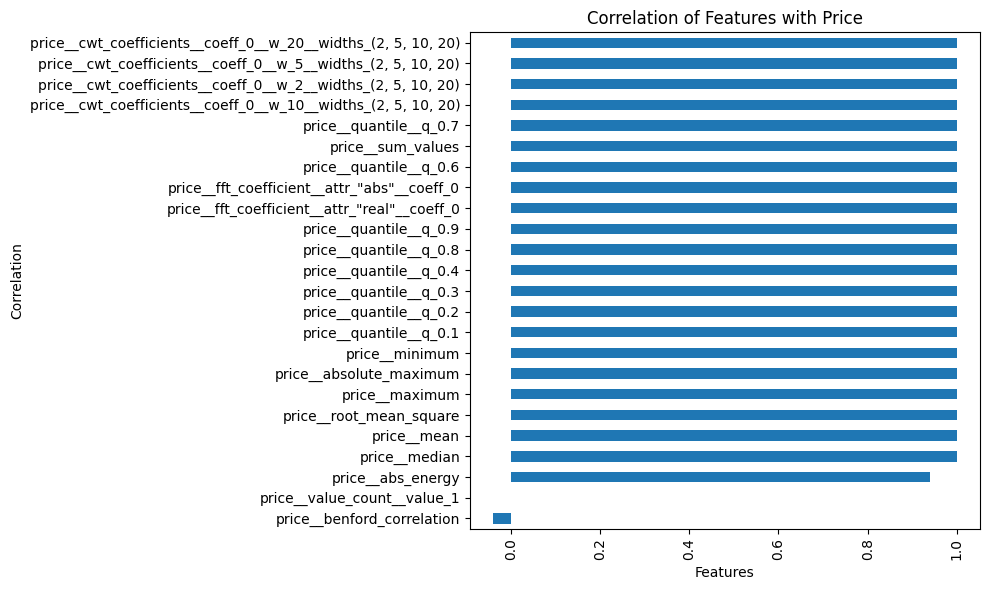

In [13]:
plt.figure(figsize=(10, 6))
correlation.sort_values().plot(kind='barh')
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()